## Cartopy: Making Maps With Geographic Projections
## Choropleth Maps: Color Geographic Regions Based on Data Values

Some parts of this lecture are modified from:
* https://github.com/SciTools/cartopy-tutorial
* https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html,
* https://www.kaggle.com/haimfeld87/volcanoes-and-earthquakes-around-the-world/data



#### Note: for figures to render properly, make sure this is a `trusted` notebook!
[This is the button in the upper right hand corner of your notebook.]

In [22]:
# standard python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# a handy trick to get rid of deprecation warnings
import warnings
warnings.filterwarnings("ignore") 

# mapping tools!!!
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader


## Cartopy

`cartopy` is a nice package for creating publication-quality maps and geographic figures. Making good maps is a more difficult task than you may anticipate, in large part because they have to project 3D data (from the globe) onto a 2D surface. Any time you do that, you lose some information, and different map "projections" apply different tactics with different strengths and weaknesses to do so.

`cartopy` projections are listed here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

And for more on chosing appropriate projections, here's a handy guide: https://pubs.usgs.gov/gip/70047422/report.pdf

### Making a simple map

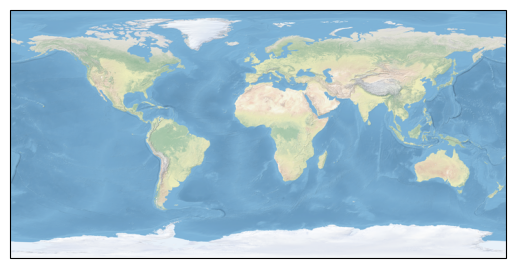

In [23]:
# Plot a global map with PlateCarree projection (simply x=lon, y=lat)
ax = plt.axes(projection=ccrs.PlateCarree()) # Set the projection for the axis
ax.stock_img(); # Add the stock background image

#### Add coastlines; try a different projection

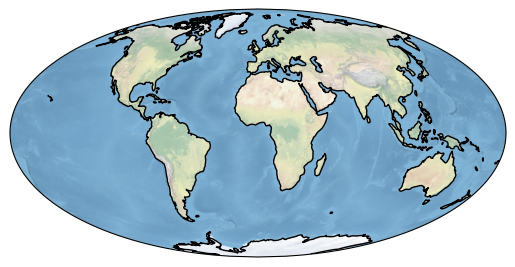

In [24]:
# Mollweide projection, now with coastlines
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
ax.coastlines();

#### Add geopolitical boundaries; try another projection

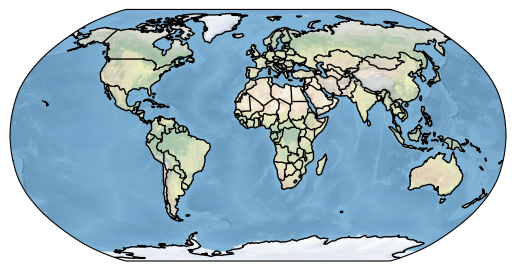

In [25]:
# Robinson projection, adding coastline and national borders as a cfeature
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-');

#### Plot with land/water instead of the stock image

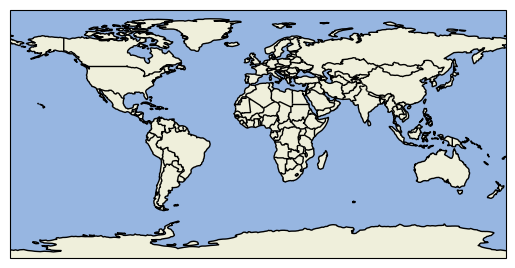

In [26]:
# Cartopy has built-in features we can add to maps
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.coastlines();

### A simple regional map

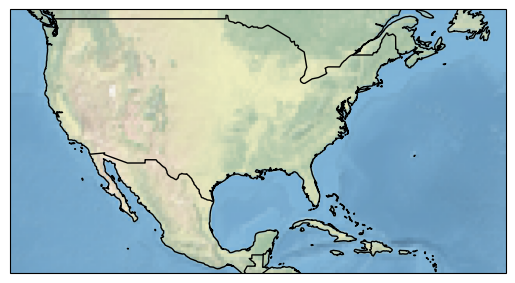

In [27]:
# For historical reasons, regional maps often use Mercator projections...
# [this is not an endorsement of that practice though!]
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-130, -50, 15, 50], # set the boundary: [lon0 lon1 lat0 lat1]
             crs=ccrs.PlateCarree()) # this tells Cartopy that the boundary has lon/lat points
ax.stock_img()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.coastlines();

---

`cartopy` includes many built-in or downloadable geographic features (https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html), and interfaces nicely with a number of geographic data formats like shapefiles.

A useful example is adding state boundaries to a map. Here we use the `cartopy.feature` interface to add them to the map.

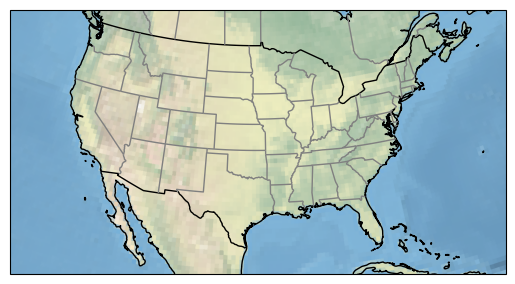

In [28]:
# Regional map with state boundaries
ax = plt.axes(projection=ccrs.LambertConformal()) # this is a nice, conical projection
ax.set_extent([-125, -66.5, 20, 50]) # set the boundary: [lon0 lon1 lat0 lat1]
ax.stock_img()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.coastlines()

# get states, add to plot
states = cfeature.NaturalEarthFeature(category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m', facecolor='none')
ax.add_feature(states, edgecolor='gray');

### Let's explore `cartopy` by plotting volcanos and earthquakes. 

In [29]:
# Load volcano dataset
df_volc = pd.read_csv("lecture20_volc.csv")
df_volc

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [30]:
# Load earthquake dataset
df_eq = pd.read_csv("lecture20_eq.csv")
df_eq.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### Extract (lat, lon) values for volcanoes and earthquakes

In [31]:
# Get coordinates for volcano
lon_vol = df_volc["Longitude"].values
lat_vol = df_volc["Latitude"].values

# Subset to only earthquakes (no explosions), extract values
df_eq = df_eq[df_eq['Type']=='Earthquake']
lon_eq = df_eq["Longitude"].values
lat_eq = df_eq["Latitude"].values
print('Number of volcanos: {:}, Number of earthquakes {:}'.format(
    lon_vol.size,lon_eq.size))

Number of volcanos: 1508, Number of earthquakes 23232


#### That's a lot of earthquakes. Let's subsample to extract the recent earthquakes.

In [32]:
# Subset to post 2010
df_eq["Date"] = pd.to_datetime(df_eq["Date"], utc=True, format="mixed")
df_eq["year"] = df_eq['Date'].dt.year
last_eq = df_eq[df_eq["year"] >= 2010].reset_index(drop=True)

# Show results
lon_eq = last_eq["Longitude"].values
lat_eq = last_eq["Latitude"].values
print('Number of volcanos: {:}, Number of earthquakes {:}'.format(lon_vol.size, lon_eq.size))

Number of volcanos: 1508, Number of earthquakes 3573


### Plot the volcanos. We need to use `transform=ccrs.PlateCarree()` when plotting the markers to convert from lon/lat to the map coordinates.

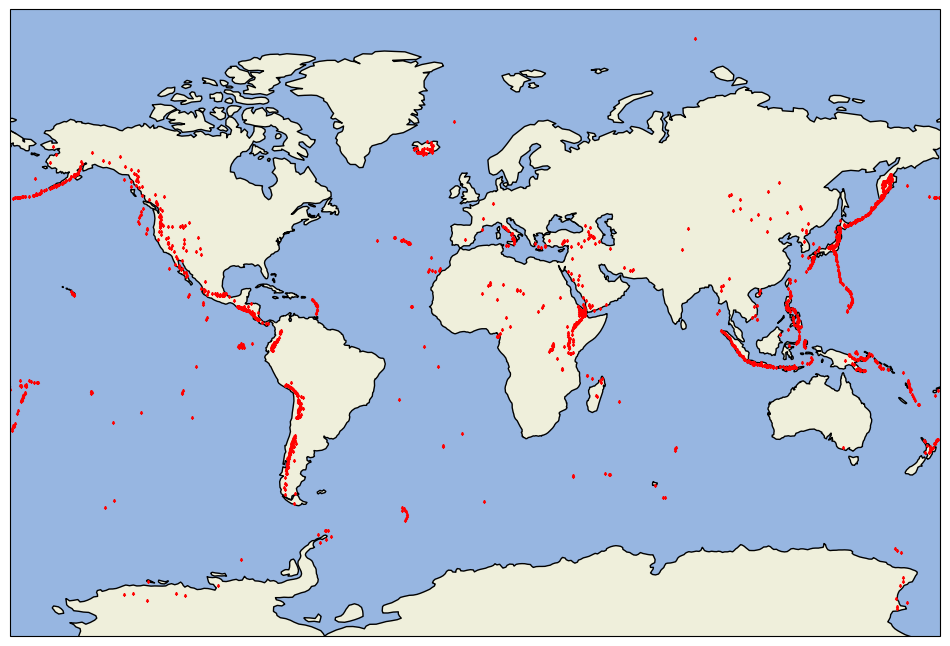

In [33]:
# Figure setup
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Miller()) # notice the projection

# Add projected features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.BORDERS,linestyle='-')
ax.coastlines()

# # Plot data: we are transforming from a lon/lat system to map projection
plt.plot(lon_vol, lat_vol, 'r^', markersize=1.5, 
          transform=ccrs.PlateCarree()); # NOTE THIS LINE!!!!!!!

#### What happens if you don't use the `transform` command?

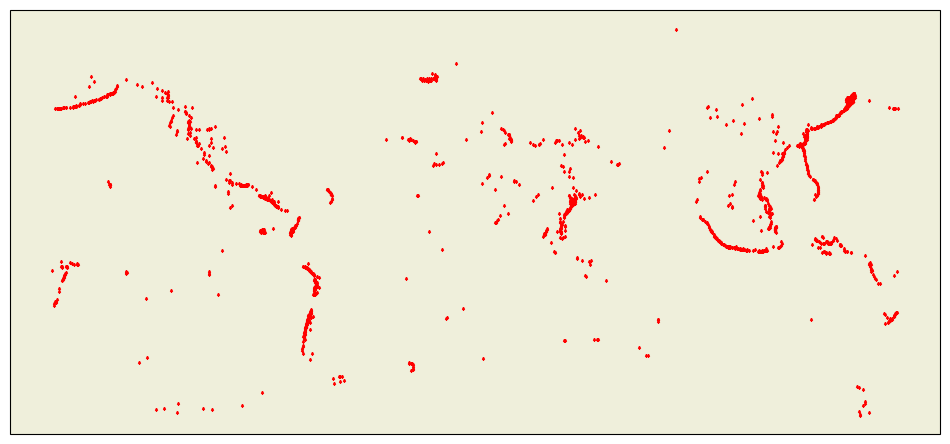

In [34]:
# Figure setup
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Miller()) # notice the projection

# Add projected features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.BORDERS,linestyle='-')
ax.coastlines()

# Plot data, forgetting the transform command...
plt.plot(lon_vol, lat_vol, 'r^', markersize=1.5); # WHAT IS MISSING????

### Plot the earthquakes using a different projection

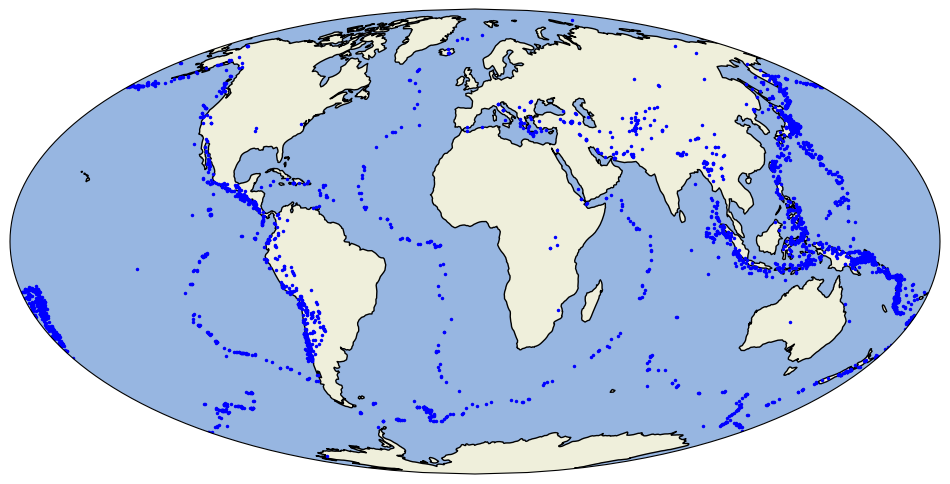

In [35]:
# Figure setup
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.Mollweide())

# Add projected features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.BORDERS,linestyle='-')
ax.coastlines()

# Plot data, remembering the transform command
plt.plot(lon_eq, lat_eq, 'bo', markersize=1.5, transform=ccrs.PlateCarree());

### Plot volcanos and earthquakes in South America

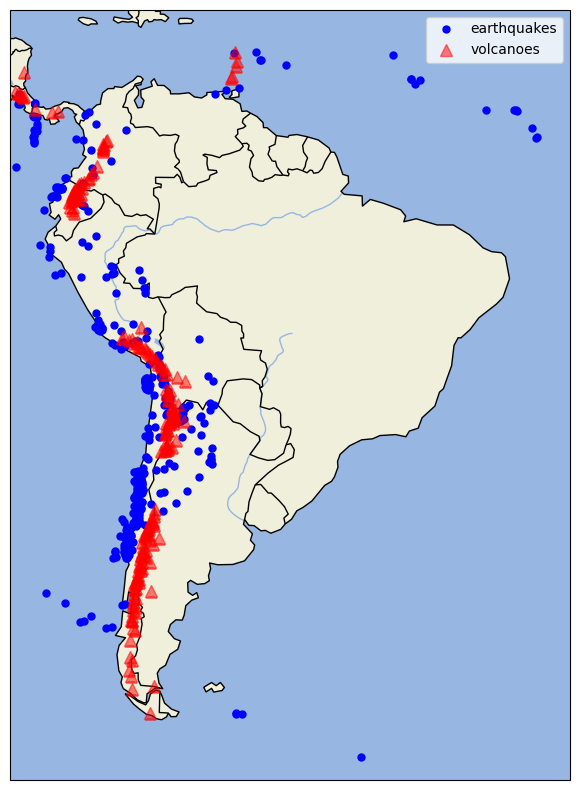

In [36]:
# Figure setup
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.TransverseMercator(central_longitude=-70.5, approx=True)) # TM Projection
ax.set_extent([-85, -30, -55, 15], crs=ccrs.PlateCarree()) # Limit map bounds

# Add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.BORDERS,linestyle='-')
ax.coastlines()

# optional but improves plotting efficiency
ipE = (lon_eq>=-85) & (lon_eq<=-30) & (lat_eq>=-55) & (lat_eq<=15)
ipV = (lon_vol>=-85) & (lon_vol<=-30) & (lat_vol>=-55) & (lat_vol<=15)

# Plot data, transforming to map coordinates
plt.plot(lon_eq[ipE], lat_eq[ipE], 'bo', markersize = 5.0, 
         transform=ccrs.PlateCarree(), label = 'earthquakes');
plt.plot(lon_vol[ipV], lat_vol[ipV], 'r^', markersize = 8.0, alpha = 0.5,
         transform=ccrs.PlateCarree(), label = 'volcanoes');
plt.legend();

## Let's import a bathymetry map and plot it with coastlines.

### Import the data

In [37]:
# From Lecture 13
topo_grid=netcdf_dataset('lecture13_topo_gom.grd') 
xtopo = np.asarray(topo_grid.variables['x'])
ytopo = np.asarray(topo_grid.variables['y'])
ztopo = np.asarray(topo_grid.variables['z'])
print(xtopo)
print(ytopo)

[-110.         -109.98333333 -109.96666667 ...  -70.03333333  -70.01666667
  -70.        ]
[14.00769718 14.02436309 14.041029   ... 39.97318464 39.98985055
 40.00651646]


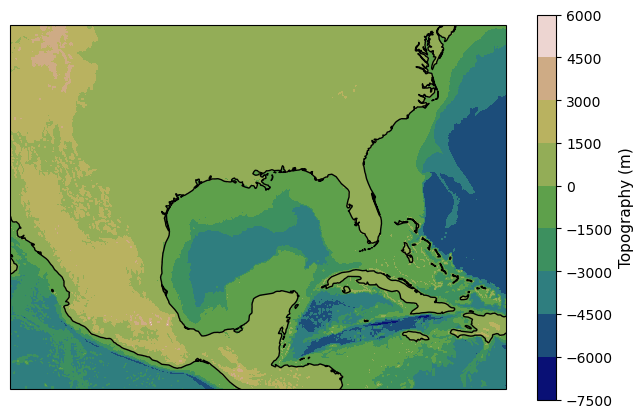

In [38]:
# Setup figure with a Mercator projection
plt.figure(figsize=(8,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-110.0, -70.0, 14.0, 40.0], crs=ccrs.PlateCarree()) # set lat/lon boundary

# Make a contour plot with coastlines
plt.contourf(xtopo, ytopo, ztopo, cmap='gist_earth', # colormap could be optimized...
             transform=ccrs.PlateCarree()) # transforms lat/lon grid
ax.coastlines()

# Make a colorbar
cb = plt.colorbar();
cb.set_label('Topography (m)', fontsize=11)

#### Adding geographic ticks

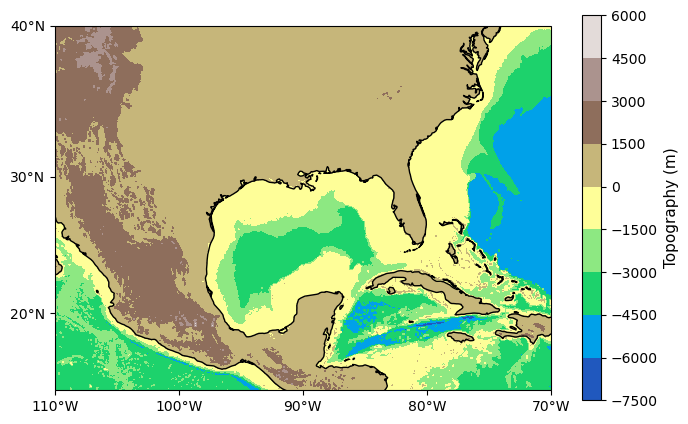

In [39]:
# Setup figure with Mercator projection
plt.figure(figsize=(8,5))
ax = plt.axes(projection=ccrs.Mercator())
ax.set_extent([-110.0, -70.0, 14.0, 40.0],crs=ccrs.PlateCarree())

# Make a contour plot with coastlines
plt.contourf(xtopo,ytopo,ztopo,cmap='terrain', # a different colormap
             transform=ccrs.PlateCarree()) # transforms lat/lon grid
ax.coastlines()

# Add Ticks
ax.set_xticks([-110, -100, -90, -80, -70], crs=ccrs.PlateCarree())
ax.set_yticks([20, 30, 40], crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter()) # formats as degrees
ax.yaxis.set_major_formatter(LatitudeFormatter()) # formats as degrees

# Make a colorbar
cb = plt.colorbar();
cb.set_label('Topography (m)', fontsize=11)

### Choropleth Maps

It is also useful to know how to make a "choropleth" map, which color-codes a geographical region (like a state or country) by some variable of interest.

Here we'll load a dataset of farm producers from the USDA and plot producer counts by US county. Note that `cartopy` does not know about county boundaries and codes internally, so we need to load a separate file.

On WebCampus, you will notice a zipped folder to download: "lecture20_counties.zip". This includes the shapefiles we need to plot counties; unzip this folder in the current working directory to run the following. 

#### county data: https://www.weather.gov/gis/Counties

#### agricultural census data: https://quickstats.nass.usda.gov/


In [40]:
### Load County data

# read in data (will need to unzip this folder before doing this)
reader = shpreader.Reader('c_05mr24/c_05mr24.shp')

# How is data organized?
records = list(reader.records())
x = records[0] # has bounds, geometry, attributes
print(x.attributes)

{'STATE': 'ME', 'CWA': 'CAR', 'COUNTYNAME': 'Washington', 'FIPS': '23029', 'TIME_ZONE': 'E', 'FE_AREA': 'se', 'LON': -67.6361, 'LAT': 45.0363}


In [41]:
### Read agricultural data

# load data
adf = pd.read_csv("lecture20_farm_producers.csv")

# keep only valid ANSI (American National Standards Institute) geographic codes
idx = (adf["State ANSI"].isna()) | (adf["County ANSI"].isna())
adf = adf[~(idx)].reset_index(drop=True)

# compute FIPS county code, which links state and county counts
adf["FIPS"] = ["{:02d}{:03.0f}".format(xx,yy) for (xx,yy) in zip(adf["State ANSI"], adf["County ANSI"])]

# make this a number instead of a string
adf["Value"] = adf["Value"].str.replace(",","").astype("int")

# show
adf

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%),FIPS
0,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (1 FEMALE PRODUCERS),145,29.4,01001
1,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (1 MALE PRODUCERS),317,20.5,01001
2,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (1 PRODUCERS),210,21.2,01001
3,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (2 FEMALE PRODUCERS),8,(H),01001
4,CENSUS,2017,YEAR,NaN,COUNTY,ALABAMA,1,BLACK BELT,40,AUTAUGA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (2 MALE PRODUCERS),23,61.6,01001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37387,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,WEST,30,UINTA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (4 MALE PRODUCERS),3,(H),56041
37388,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,WEST,30,UINTA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (4 PRODUCERS),11,(H),56041
37389,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,WEST,30,UINTA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (5 OR MORE FEMALE PRODUCERS),5,(H),56041
37390,CENSUS,2017,YEAR,NaN,COUNTY,WYOMING,56,WEST,30,UINTA,...,NaN,0,NaN,PRODUCERS,PRODUCERS - NUMBER OF OPERATIONS,PRODUCERS,PRODUCERS: (5 OR MORE MALE PRODUCERS),5,(H),56041


In [42]:
### Extract agricultural data and place it in the county records

# map FIPS to Value in the ag dataset
fipsD = dict( zip(adf["FIPS"].values, adf["Value"].values) )

# loop over all records, update with a value to plot (# of producers)
count1, count2 = 0, 0
for x in records:
    fips = x.attributes["FIPS"]
    if fips in fipsD:
        x.attributes["Value"] = fipsD[fips]
        count1 +=1
    else:
        x.attributes["Value"] = np.nan
        count2 +=1

# print data
print(count1, "values updated")

3149 values updated


In [43]:
### Next, lets get all California/Nevada records

# subset by state
canv = [c for c in records if c.attributes['STATE'] in['CA', 'NV']] 

# show the first one, the "Value" is what we'll plot
print(canv[0].attributes)

{'STATE': 'CA', 'CWA': 'LOX', 'COUNTYNAME': 'Santa Barbara', 'FIPS': '06083', 'TIME_ZONE': 'P', 'FE_AREA': 'sw', 'LON': -120.0165, 'LAT': 34.6731, 'Value': 56}


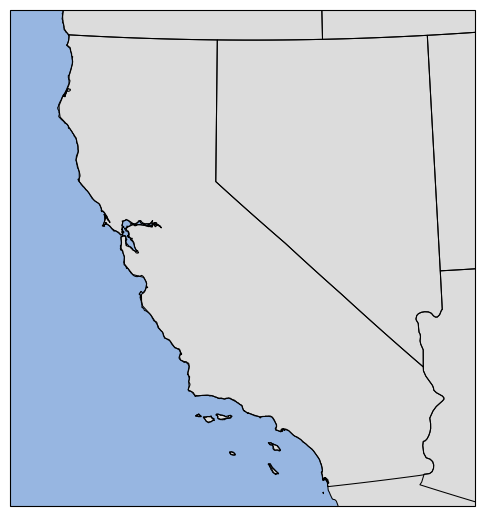

In [44]:
### Function to create a simple map of California/Nevada

# setup projection
crs = ccrs.LambertConformal(central_longitude=-119)
extent = [-125, -113.5, 32, 42.5]

# simple drawing
def draw_canv(ax, extent): # a geoaxis
    ax.set_extent(extent)
    ax.add_feature(cfeature.LAND.with_scale("50m"), color="gainsboro")
    ax.add_feature(cfeature.OCEAN.with_scale("50m"))
    ax.add_feature(cfeature.STATES.with_scale("50m"), edgecolor="black", linewidth=0.75)
    ax.coastlines(linewidth=0.75)

# test this out
fig, ax = plt.subplots(1, 1, figsize=(6, 8), subplot_kw=dict(projection=crs))
draw_canv(ax, extent)

In [45]:
### Choropleth Map by County

# input the record data, axis, the attribute to draw, and the colormap name
def county_choropleth(data, ax, attr, cmap_name):

    # additional matplotlib stuff
    from matplotlib.colors import Normalize
    from matplotlib import colormaps
    
    # We need to normalize the values before we can use the colormap.
    values = np.array([c.attributes[attr] for c in data])
    norm = Normalize(vmin=np.min(values), vmax=np.max(values))
    cmap = colormaps[cmap_name]

    # plot data, one county at a time
    for c in data:
        v = c.attributes[attr] # get the county value
        sp = ShapelyFeature(c.geometry, crs=ccrs.PlateCarree(),
                            edgecolor=None, facecolor=cmap(norm(v)))
        ax.add_feature(sp)

    # add a colorbar, the scatter is a kluge to get it to link to the data above
    sc = ax.scatter(0*values-999, 0*values-999, s=0.000001+0*values, c=values,
                   cmap=cmap, transform=ccrs.PlateCarree())
    cb = plt.colorbar(sc, ax = ax, pad=0.01, shrink=0.50, aspect=30, extend="both")
    
    # return this
    return ax, cb

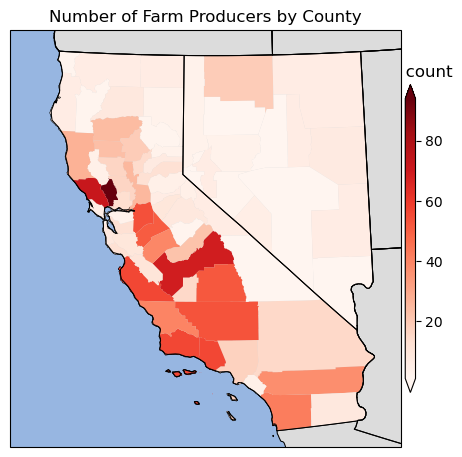

In [46]:
### Make a Choropleth Map

# create figure
fig, ax = plt.subplots(1, 1, figsize=(6, 8), subplot_kw=dict(projection=crs))

# draw basemap
draw_canv(ax, extent)

# add data
ax, cb = county_choropleth(canv, ax, 'Value', 'Reds')

# formatting
cb.ax.set_title("       count")
ax.add_feature(cfeature.STATES.with_scale("50m"),edgecolor="black",linewidth=0.75) # redraw after county overlap
ax.set_title('Number of Farm Producers by County');

# Summary
* Plotting geographic data on maps requires a choice of projection.
* `cartopy` is a great for making quality "static" maps for publications or similar
* It includes several useful features that can be plotted alongside datasets of interest
* Choropleth maps color-code geographic regions by some quantity of interest